In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [152]:
fr_videos = pd.read_csv("./../data/FRvideos.csv")
with open("./../data/FR_category_id.json", 'r') as f:
    fr_videos_json = json.load(f)

In [153]:
fr_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Ile De France,48.533302,2.666648,POINT (2.666648314 48.53330243)
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Corse,41.927065,8.728294,POINT (8.728293821999999 41.92706484)
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon""|""pokémon""|""école""|""ours""|""мультфильм",482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...,Limousin,45.150408,1.533332,POINT (1.533332477 45.15040814)
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier""|""Metal Gear Solid""|""PS1""|""Tirage...",925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",Moyotte,-12.787089,45.275004,POINT (45.27500362 -12.78708901)
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo""|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""di...",141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,Pays De La Loire,47.480008,-0.530030,POINT (-0.530029949 47.48000755)


In [154]:
fr_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                40724 non-null  object 
 1   trending_date           40724 non-null  object 
 2   title                   40724 non-null  object 
 3   channel_title           40724 non-null  object 
 4   category_id             40724 non-null  int64  
 5   publish_time            40724 non-null  object 
 6   tags                    40724 non-null  object 
 7   views                   40724 non-null  int64  
 8   likes                   40724 non-null  int64  
 9   dislikes                40724 non-null  int64  
 10  comment_count           40724 non-null  int64  
 11  thumbnail_link          40724 non-null  object 
 12  comments_disabled       40724 non-null  bool   
 13  ratings_disabled        40724 non-null  bool   
 14  video_error_or_removed  40724 non-null

In [155]:
# Crear el diccionario de mapeo category_title -> title
category_mapping = {int(item['id']): item['snippet']['title'] for item in fr_videos_json['items']}

# Verificar el diccionario de mapeo
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [156]:
fr_videos["trending_date"] = pd.to_datetime(fr_videos["trending_date"], format = '%y.%d.%m')
fr_videos["publish_time"] = pd.to_datetime(fr_videos["publish_time"])

In [157]:
# Añadir una nueva columna 'category_title' usando el mapeo
fr_videos['category_title'] = fr_videos['category_id'].map(category_mapping)

# Columnas a eliminar
columnas_a_eliminar = [
    'thumbnail_link',
    'comments_disabled',
    'ratings_disabled',
    'video_error_or_removed',
    'description',
    'lat',
    'lon',
    'geometry'
]

# Eliminar las columnas innecesarias
fr_videos.drop(columns=columnas_a_eliminar, inplace=True)

# Ver las primeras filas del dataset para verificar
print(fr_videos.head())


      video_id trending_date  \
0  Ro6eob0LrCY    2017-11-14   
1  Yo84eqYwP98    2017-11-14   
2  ceqntSXE-10    2017-11-14   
3  WuTFI5qftCE    2017-11-14   
4  ee6OFs8TdEg    2017-11-14   

                                               title        channel_title  \
0           Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1  LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2  DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...      Daniil le Russe   
3                    PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4  QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...    Aurelien Fontenoy   

   category_id              publish_time  \
0           24 2017-11-13 17:32:55+00:00   
1           24 2017-11-12 15:00:02+00:00   
2           23 2017-11-13 17:00:38+00:00   
3           20 2017-11-12 17:00:02+00:00   
4           17 2017-11-13 16:30:03+00:00   

                                                tags   views  likes  dislikes  

In [158]:
fr_videos['trend_score'] = (
    fr_videos['views'] * 0.4 +
    fr_videos['likes'] * 0.3 -
    fr_videos['dislikes'] * 0.1 +
    fr_videos['comment_count'] * 0.2
)

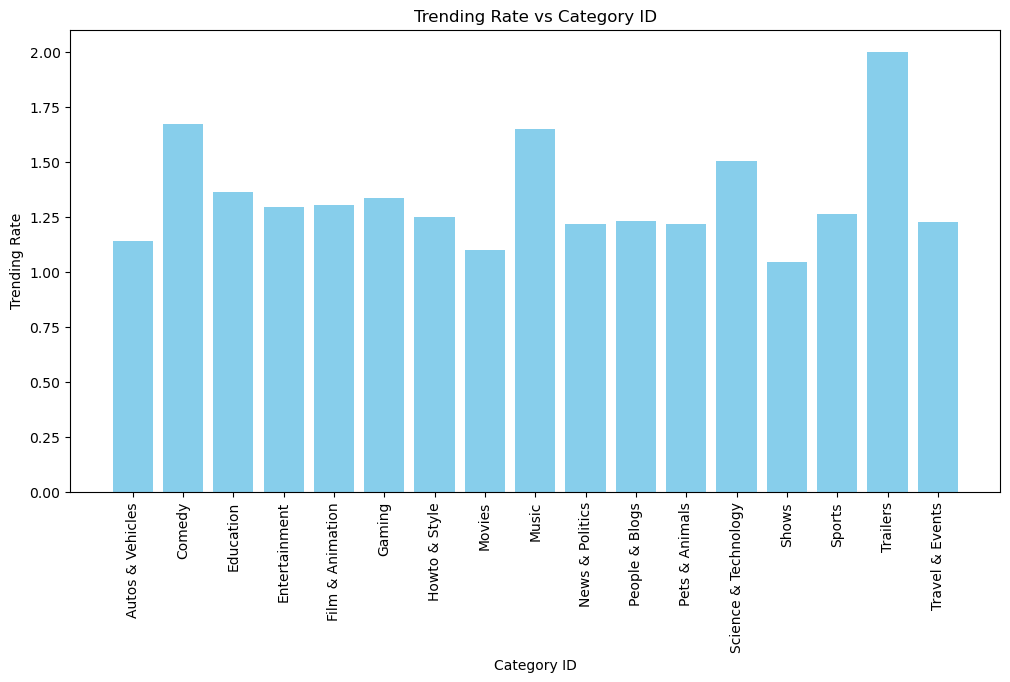

In [159]:
# Aquí asumimos que cada fila en fr_videos es una entrada de un video en tendencia
tendencia_por_categoria = fr_videos['category_title'].value_counts()

# Calcular el número total de videos únicos por categoría
videos_por_categoria = fr_videos.drop_duplicates(subset=['video_id']).groupby('category_title').size()

# Calcular el trending_rate como la proporción de videos en tendencia sobre el total de videos por categoría
trending_rate = tendencia_por_categoria / videos_por_categoria

# Crear el DataFrame para el gráfico
df_trending_rate = pd.DataFrame({
    'category_title': trending_rate.index,
    'trending_rate': trending_rate.values
}).sort_values(by='category_title')


# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_trending_rate['category_title'], df_trending_rate['trending_rate'], color='skyblue')
plt.xlabel('Category ID')
plt.ylabel('Trending Rate')
plt.title('Trending Rate vs Category ID')
plt.xticks(df_trending_rate['category_title']) 
plt.xticks(rotation=90)
 # Mostrar los números exactos de category_title en el eje x
plt.show()

In [160]:
# Agrupar por categoría y calcular el total de likes y dislikes por categoría
category_likes = fr_videos.groupby('category_title')['likes'].sum()
category_dislikes = fr_videos.groupby('category_title')['dislikes'].sum()

# Calcular la proporción likes / dislikes por categoría
category_ratio = category_likes / category_dislikes

# Crear un DataFrame con los resultados
ratios_df = pd.DataFrame({
    'category': category_likes.index,
    'likes_dislikes_ratio': category_ratio
})

# Ordenar el DataFrame por la proporción likes / dislikes de forma descendente
ratios_df = ratios_df.sort_values(by='likes_dislikes_ratio', ascending=False)

# Mostrar el DataFrame con las proporciones
print(ratios_df)

                                  category  likes_dislikes_ratio
category_title                                                  
Travel & Events            Travel & Events             79.396539
Education                        Education             41.233041
Comedy                              Comedy             38.571022
Science & Technology  Science & Technology             36.169455
Autos & Vehicles          Autos & Vehicles             30.745637
Pets & Animals              Pets & Animals             29.948846
Music                                Music             28.377529
Howto & Style                Howto & Style             24.115922
Movies                              Movies             23.182252
Film & Animation          Film & Animation             22.540890
Trailers                          Trailers             21.333333
Gaming                              Gaming             20.504387
Sports                              Sports             20.487167
People & Blogs           

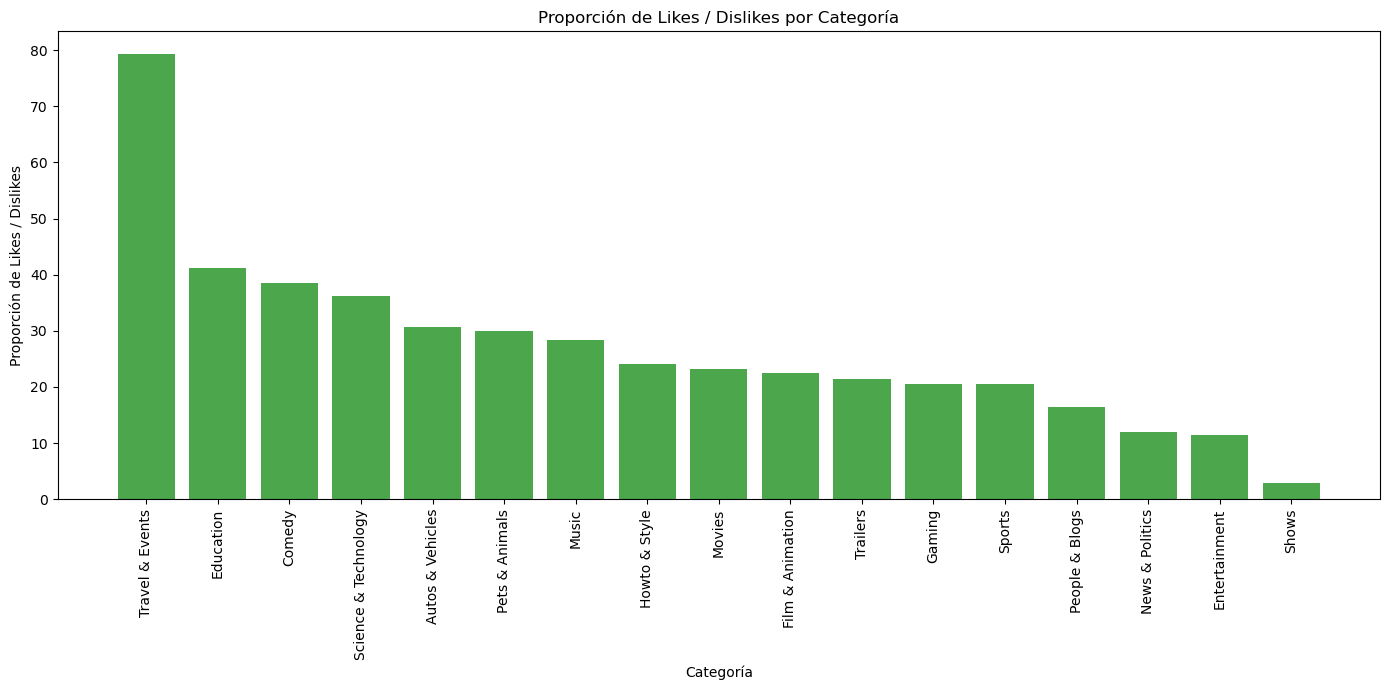

In [161]:

# Graficar la proporción likes / dislikes por categoría
plt.figure(figsize=(14, 7))
plt.bar(ratios_df['category'], ratios_df['likes_dislikes_ratio'], color='green', alpha=0.7)
plt.xlabel('Categoría')
plt.ylabel('Proporción de Likes / Dislikes')
plt.title('Proporción de Likes / Dislikes por Categoría')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [162]:
# Filtrar los datos para excluir los registros donde comment_count es cero
fr_videos_filtered = fr_videos[fr_videos['comment_count'] != 0]

# Agrupar por categoría y calcular el total de vistas y comentarios por categoría
category_views = fr_videos_filtered.groupby('category_title')['views'].sum()
category_comments = fr_videos_filtered.groupby('category_title')['comment_count'].sum()

# Calcular la proporción views / comments por categoría
category_views_comments_ratio = category_views / category_comments

# Crear un DataFrame con los resultados
ratios_df = pd.DataFrame({
    'category': category_views.index,
    'views_comments_ratio': category_views_comments_ratio
})

# Ordenar el DataFrame por la proporción views / comments de forma descendente
ratios_df = ratios_df.sort_values(by='views_comments_ratio', ascending=False)

# Mostrar el DataFrame con las proporciones
print(ratios_df)

                                  category  views_comments_ratio
category_title                                                  
Shows                                Shows           1154.670046
Movies                              Movies            700.895706
Sports                              Sports            434.798003
Film & Animation          Film & Animation            315.310790
People & Blogs              People & Blogs            276.022240
Howto & Style                Howto & Style            266.015373
News & Politics            News & Politics            239.774031
Entertainment                Entertainment            236.040143
Pets & Animals              Pets & Animals            230.988709
Comedy                              Comedy            207.025184
Music                                Music            196.727558
Autos & Vehicles          Autos & Vehicles            173.379155
Education                        Education            155.189773
Science & Technology  Sci

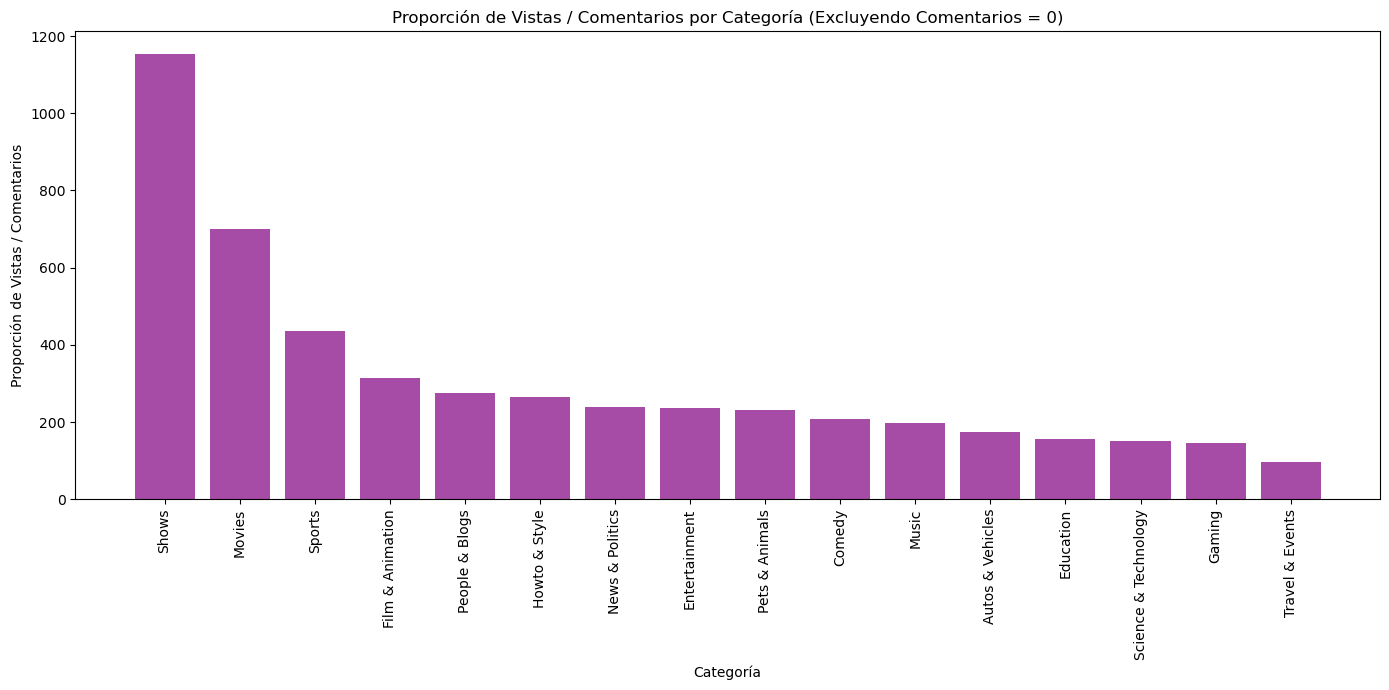

In [163]:
# Graficar la proporción views / comments por categoría
plt.figure(figsize=(14, 7))
plt.bar(ratios_df['category'], ratios_df['views_comments_ratio'], color='purple', alpha=0.7)
plt.xlabel('Categoría')
plt.ylabel('Proporción de Vistas / Comentarios')
plt.title('Proporción de Vistas / Comentarios por Categoría (Excluyendo Comentarios = 0)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [164]:


# Agrupar y sumar por estado para obtener el total de likes, vistas y dislikes
state_likes = fr_videos.groupby('state')['likes'].sum()
state_views = fr_videos.groupby('state')['views'].sum()
state_dislikes = fr_videos.groupby('state')['dislikes'].sum()





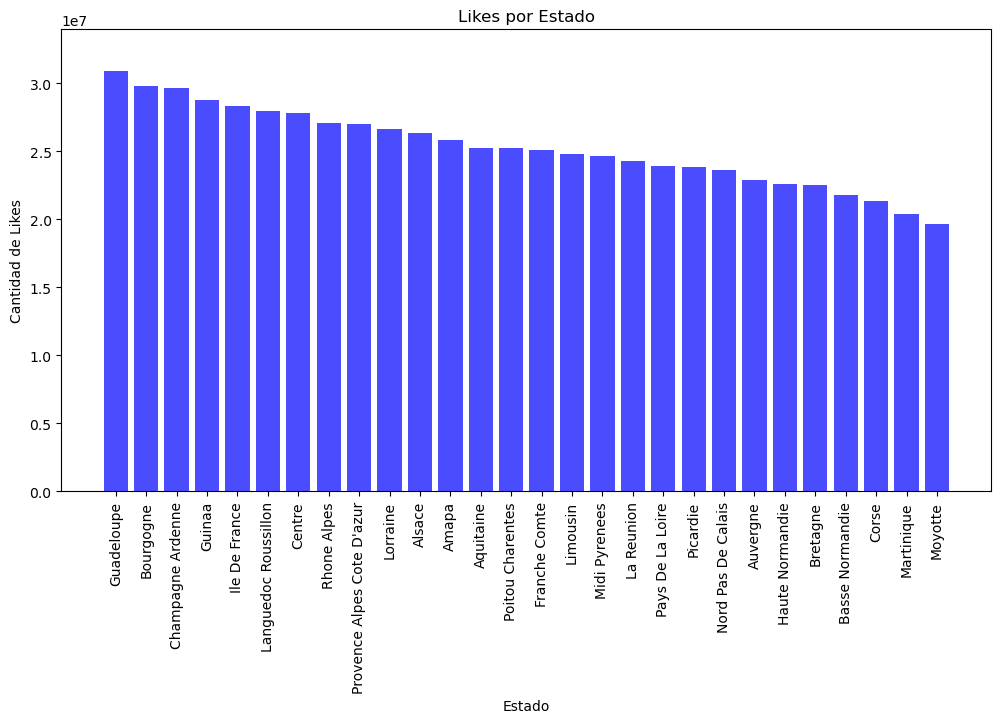

In [165]:
# Gráfico de Likes por Estado
state_likes = state_likes.sort_values(ascending=False)

# Crear figura y ejes para los gráficos de manera separada
fig1, ax1 = plt.subplots(figsize=(12, 6))



ax1.bar(state_likes.index, state_likes.values, color='b', alpha=0.7)
ax1.set_xlabel('Estado')
ax1.set_ylabel('Cantidad de Likes')
ax1.set_title('Likes por Estado')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, state_likes.max() * 1.1)  # Ajustar el límite del eje y para mostrar todos los likes

# Mostrar el primer gráfico
plt.show(fig1)

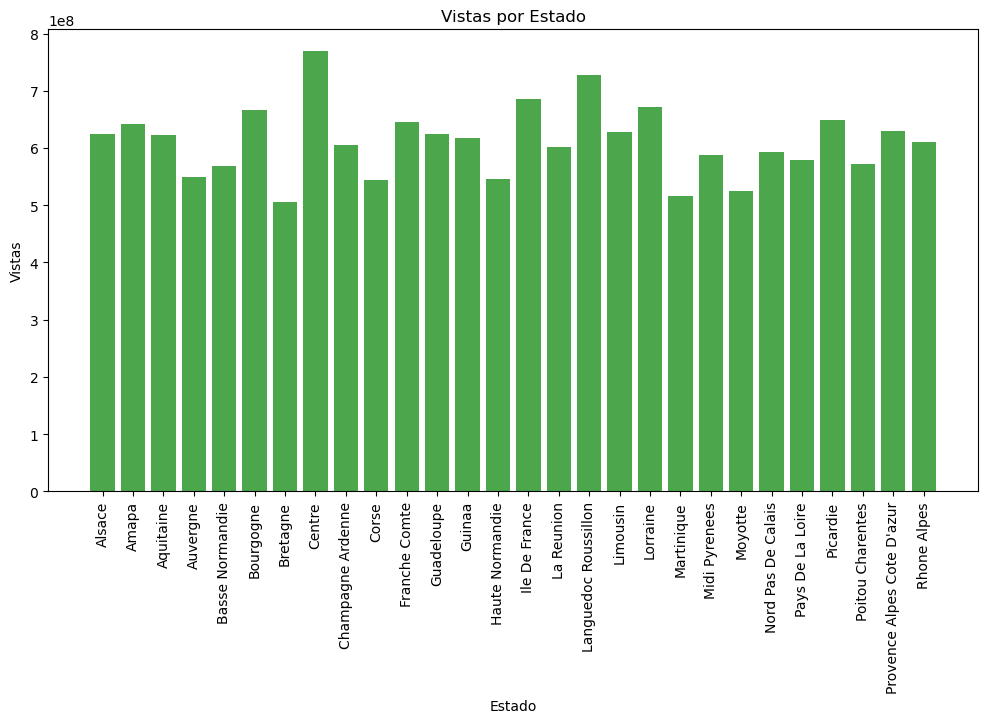

In [166]:
fig2, ax2 = plt.subplots(figsize=(12, 6))
# Gráfico de Vistas por Estado
ax2.bar(state_views.index, state_views.values, color='g', alpha=0.7)
ax2.set_xlabel('Estado')
ax2.set_ylabel('Vistas')
ax2.set_title('Vistas por Estado')
ax2.tick_params(axis='x', rotation=90)

# Mostrar el segundo gráfico
plt.show(fig2)


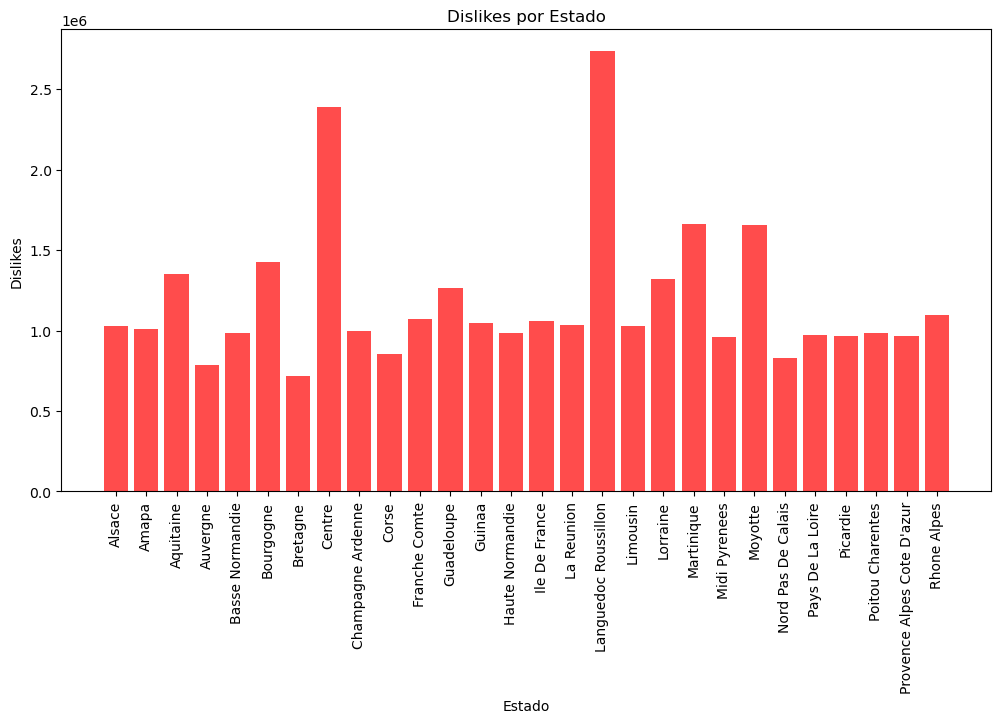

In [167]:
fig3, ax3 = plt.subplots(figsize=(12, 6))
# Gráfico de Dislikes por Estado
ax3.bar(state_dislikes.index, state_dislikes.values, color='r', alpha=0.7)
ax3.set_xlabel('Estado')
ax3.set_ylabel('Dislikes')
ax3.set_title('Dislikes por Estado')
ax3.tick_params(axis='x', rotation=90)

# Mostrar el tercer gráfico
plt.show(fig3)

In [184]:

fr = fr_videos.dropna()

unique_tags = fr_videos['tags'].unique()
unique_states = fr_videos['state'].unique()
# Crear un diccionario para mapear tags únicos a números únicos
tag_to_number = {tag: idx for idx, tag in enumerate(unique_tags)}
state_to_number = {state: idx for idx, state in enumerate(unique_states)}

# Reemplazar los tags por números en la columna 'tags'
fr['tags'] = fr['tags'].map(tag_to_number)
fr['state'] = fr['state'].map(state_to_number)


/var/folders/fy/c01940852sgbptqkxgpnpxtm0000gn/T/ipykernel_1024/487192732.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['tags'] = fr['tags'].map(tag_to_number)
/var/folders/fy/c01940852sgbptqkxgpnpxtm0000gn/T/ipykernel_1024/487192732.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['state'] = fr['state'].map(state_to_number)


In [185]:
fr['trending_date'] = pd.to_datetime(fr['trending_date'])
fr['publish_time'] = pd.to_datetime(fr['publish_time']).dt.tz_localize(None) 

fr['days_since_published'] = (fr['trending_date'] - fr['publish_time']).dt.days


/var/folders/fy/c01940852sgbptqkxgpnpxtm0000gn/T/ipykernel_1024/3940743415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['trending_date'] = pd.to_datetime(fr['trending_date'])
/var/folders/fy/c01940852sgbptqkxgpnpxtm0000gn/T/ipykernel_1024/3940743415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['publish_time'] = pd.to_datetime(fr['publish_time']).dt.tz_localize(None)
/var/folders/fy/c01940852sgbptqkxgpnpxtm0000gn/T/ipykernel_1024/3940743415.py:4: SettingWithCopyWarning: 
A value is trying

In [183]:






X = fr.drop(columns=['likes', 'video_id', 'trend_score', 'category_title', 'title', 'channel_title', 'treding_date', 'publish_time'])
y = fr['likes']

X.info()


TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects.

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)


Dimensiones de X_train: (32488, 8)
Dimensiones de y_train: (32488,)


In [181]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los likes en el conjunto de prueba
y_pred = model.predict(X_test)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
# Calcular el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")